In [2]:
# from oxksc.cbvc import cbv
import lightkurve as lk
import tarfile
import glob
import matplotlib.pyplot as plt
# import fitsio 
import numpy as np
from scipy.stats import skew

import utils
from astropy.timeseries import BoxLeastSquares, LombScargle
from scipy.optimize import curve_fit
# from utils import amplitude_spectrum
# import batman

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

ModuleNotFoundError: No module named 'utils'

In [ ]:
# print('Starting planet search 2')

# af_stars = pd.read_csv('rev_AF_stars.csv', dtype={'kic': str})
# af_stars = af_stars[af_stars['dSct'] > 0]

# kep_lc = glob.glob('lc/*.csv')
# ids = [k.split('kplr')[-1].split('.csv')[0].lstrip('0') for k in kep_lc]

# files = pd.DataFrame({'kic': ids, 'file': kep_lc})
# df = af_stars.merge(files, left_on='kic', right_on='kic')

# missing = af_stars[~af_stars['kic'].isin(df['kic'])]
# print(f"There are {len(missing)} missing stars from the sample")

In [ ]:
%run setup.py
plt.style.use('science')

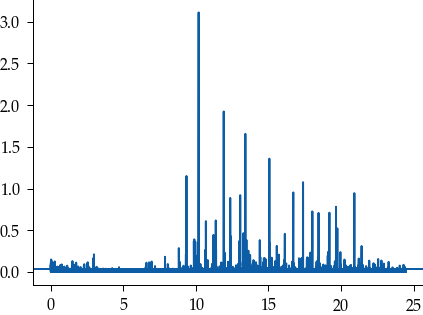

In [4]:
import glob
import numpy as np
# kplr009845898
file = glob.glob('/Volumes/silo2/dhey3294/AF Transit/data/lc_pdc/*2695030.csv*')
time, flux, flux_err = np.loadtxt(file[0]).T
flux -= 1
flux *= 1e3
time = np.ascontiguousarray(time)
f,a = amplitude_spectrum(time, flux)
plt.plot(f,a)
plt.axhline(1 * np.nanstd(a))
# plt.ylim(0,0.00025)

In [5]:
from balmung import Balmung

bm = Balmung(time, flux)
bm.prewhiten(fmin=1, maxiter=100)

100%|██████████| 100/100 [00:42<00:00,  2.37it/s]


In [6]:
import seaborn as sns

ccs = sns.color_palette("Reds", len(bm.removed))[::-1]

[(0.0, 3.271580608509127),
 Text(0, 0.5, 'Amplitude [ppt]'),
 (0.0006800582614888013, 24.46944832993314),
 Text(0.5, 0, 'Frequency [day$^{-1}$]')]

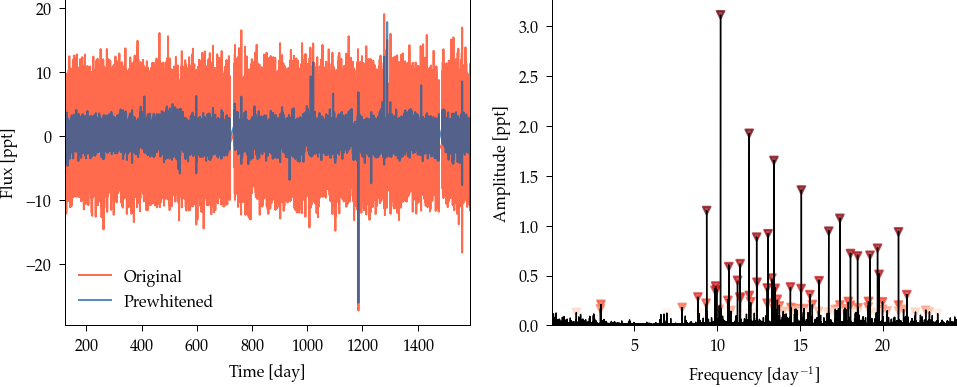

In [7]:
fig, axes = plt.subplots(1,2, figsize=[8, 3])
ax = axes[0]
ax.plot(bm.time, bm.flux, c='C3', alpha=0.7, label='Original')
ax.plot(bm.time, bm.residual, c='C0', alpha=0.7, label='Prewhitened')
ax.set(xlim=[bm.time[0], bm.time[-1]], xlabel='Time [day]', ylabel='Flux [ppt]')
ax.legend(fontsize=8)

ax = axes[1]
f,a = amplitude_spectrum(bm.time, bm.flux)
ax.plot(f,a, 'k', lw=0.7)
ax.scatter(np.array(bm.removed)[:,0], np.array(bm.removed)[:,1], marker='v', color=ccs, alpha=0.7, s=15)
ax.set(xlim=(f[0], f[-1]), ylim=(0, None), xlabel=r'Frequency [day$^{-1}$]', ylabel='Amplitude [ppt]')

# plt.savefig(overleaf_path + 'prewhiten.pdf')